<a href="https://colab.research.google.com/github/guilhermedossantos/NN_with_different_structures_Test/blob/master/redes_dif_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tentativa de Comparação entre Redes com Diferentes Estruturas

In [0]:
#### SETUP ####
# Keras
from keras.models import Sequential # modelo
from keras.layers import Dense, SimpleRNN, LSTM, Reshape # camadas
from keras.callbacks import EarlyStopping # early stopping

# Importação do arquivo (caso não esteja sendo lido do github)
from google.colab import files

# Gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # usado no qq-plot
import plotly.tools as tls # para tentativa de converter mpl to plotly

# Tentativa de esconder warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Upload do arquivo (específico do google colab por ser online)
#files.upload()

In [0]:
# Série (raiz)
serie = pd.read_csv("https://raw.githubusercontent.com/guilhermedossantos/NN_with_different_structures_Test/master/serie_bilheteria.csv",   index_col=0)
serie = np.sqrt(np.array(serie)) # tirando a raiz da série

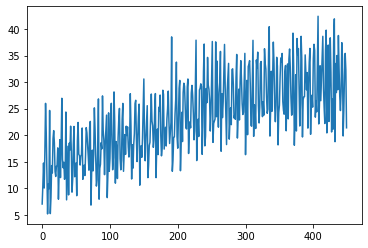

In [4]:
plt.plot(serie)

In [0]:
serie = serie.reshape(450,)

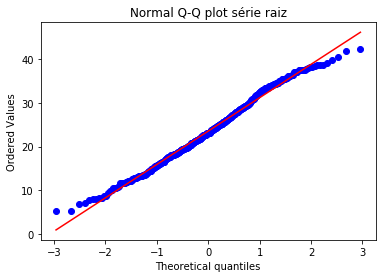

In [6]:
# q-q plot (n importa mt para as redes, mas fiquei curioso)
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal Q-Q plot série raiz")
plt.show()

In [0]:
# Função que transforma a série em uma matriz com 12 colunas (entradas da rede)
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)
 
serie_step_x, serie_step_y = convertToMatrix(serie, 12)

# Dimensões necessárias para o uso da camada recorrente
serie_step_x = serie_step_x.reshape((438, 12, 1))
serie_step_y = serie_step_y.reshape((438, 1))

# Separação Treino(350)/Validação(50)/Teste(38)
treinoX = serie_step_x[0:350]
treinoY = serie_step_y[0:350]
valX    = serie_step_x[350:400]
valY    = serie_step_y[350:400]
testeX  = serie_step_x[400:]
testeY  = serie_step_y[400:]

#treinoxmlp = treinoX.reshape((337,12))
#valxmlp = valX.reshape((38,12))
#testexmlp = testeX.reshape((38,12))


#treinoX.reshape((337,-1,12))
#treinoY = treinoY.reshape((337,1,1)) # AAAA
#valY = valY.reshape((38,))

In [8]:
print(valX.shape)
print(treinoY.shape)

(50, 12, 1)
(350, 1)


## Modelos

### Redes Recorrentes

In [0]:
# 1 camada com 128
model1_128_rec = Sequential([
    SimpleRNN(128, input_shape = (12,1), activation='relu'),
    Dense(1, activation='linear')
])

# 2 camadas com 64
model2_64_rec = Sequential([
    SimpleRNN(64, input_shape = (12,1), activation='relu', return_sequences=True), # return_sequences = True necessário quando a prox. camada é recorrente
    SimpleRNN(64, activation='relu'),
    Dense(output_dim = 1, activation='linear')
])

# 4 camadas com 32 neurônios
model4_32_rec = Sequential([
    SimpleRNN(32, input_shape = (12,1), activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu', return_sequences=True),
    SimpleRNN(32, activation='relu'),
    Dense(1, activation='linear')
])

# 8 camadas com 16 neurônios
model8_16_rec = Sequential([
    SimpleRNN(16, input_shape = (12,1), activation='relu', return_sequences=True), 
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu', return_sequences=True),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='linear')
])



### Redes *feedforward*

In [0]:
model1_128_perc = Sequential([
    Dense(128, input_shape = (12,), activation='relu'),
    Dense(1, activation='linear')
])

model2_64_perc = Sequential([
    Dense(64, input_shape = (12,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model4_32_perc = Sequential([
    Dense(32, input_shape = (12,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model8_16_perc = Sequential([
    Dense(16, input_shape = (12,), activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

##### Compilando os modelos e treinando

In [0]:
## EARLY STOP callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', min_delta=2,
  patience=10,
  mode = 'min')

# recorrrentes
model1_128_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model2_64_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model4_32_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model8_16_rec.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])

# feedforwards
model1_128_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model2_64_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model4_32_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])
model8_16_perc.compile(optimizer='adam', loss = 'mse', metrics = ['mse', 'mape', 'mae'])

In [0]:
### RECORRENTES ###
# NÃO ESQUECER DOS CALLBACKS (quando comentados)
history1 = model1_128_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history2 = model2_64_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history3 = model4_32_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])
history4 = model8_16_rec.fit(x = treinoX, y = treinoY, epochs=250, verbose=0, validation_data=(valX, valY), callbacks=[earlystop_callback])


In [0]:
### FEEDFORWARD ###
# reshape para deixar no formato para a rede feedforward (que requer uma dimensão a menos que a rede recorrente)
treinoxmlp = treinoX.reshape((350,12))
treinoymlp = treinoY.reshape((350,-1))
valxmlp = valX.reshape((50,12))
valymlp = valY.reshape((50,-1))
testexmlp = testeX.reshape((38,12))
testeymlp = testeY.reshape((38,-1))


history1_ff = model1_128_perc.fit(x = treinoxmlp, y = treinoymlp, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history2_ff = model2_64_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history3_ff = model4_32_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])
history4_ff = model8_16_perc.fit(x  = treinoxmlp, y = treinoY, epochs=250, verbose=0, validation_data=(valxmlp, valymlp), callbacks=[earlystop_callback])

## Comparação dos modelos

In [0]:
labels_modelos = ['rec_128','rec_64','rec_32','rec_16','ff_128','ff_64','ff_32','ff_16']
modelos = [model1_128_rec, model2_64_rec, model4_32_rec, model8_16_rec, model1_128_perc, model2_64_perc, model4_32_perc, model8_16_perc]
treinamentos = [history1, history2, history3, history4, history1_ff, history2_ff, history3_ff, history4_ff] 

In [0]:
# Número de épocas antes da parada (com early stopping) e número de parâmetros do modelo
epocas = [len(x.history['loss']) for x in treinamentos] # Número de épocas que o treinamento levou
n_params = [x.count_params() for x in modelos]

# Erros na base de treino e Validação
mse_treino = [round(x.history['loss'][-1], 3) for x in treinamentos]
mse_val = [round(x.history['val_loss'][-1], 3) for x in treinamentos]
mape_treino = [round(x.history['mean_absolute_percentage_error'][-1], 3) for x in treinamentos]
mape_val = [round(x.history['val_mean_absolute_percentage_error'][-1], 3) for x in treinamentos]
mae_treino = [round(x.history['mean_absolute_error'][-1], 3) for x in treinamentos]
mae_val = [round(x.history['val_mean_absolute_error'][-1], 3) for x in treinamentos]

# Erros na base de teste
erros = list()

# for pois as bases de teste têm dimensões diferentes entre si
for i in range(8):
  if(i <= 3):
    erros.append(modelos[i].evaluate(testeX, testeY, verbose = 0))
  else:
    erros.append(modelos[i].evaluate(testexmlp, testeymlp, verbose = 0))

erros = np.round(np.array(erros),3)

mse_teste = erros[:,0]
mape_teste = erros[:,2]
mae_teste = erros[:,3]



In [91]:
resumo = pd.DataFrame({'Épocas' : epocas,
                       'Parâmetros': n_params,
                       'MSE_treino': mse_treino,
                       'MSE_val' : mse_val,
                       'MSE_teste': mse_teste,
                       'MAE_treino':mae_treino,
                       'MAE_val':mae_val,
                       'MAE_teste':mae_teste,
                       'MAPE_treino':mape_treino,
                       'MAPE_val':mape_val,
                       'MAPE_teste':mape_teste},
                      index = labels_modelos)
resumo

,Épocas,Parâmetros,MSE_treino,MSE_val,MSE_teste,MAE_treino,MAE_val,MAE_teste,MAPE_treino,MAPE_val,MAPE_teste
rec_128,30,16769,8.330,11.469,22.924,2.247,2.836,3.715,11.027,9.868,13.538
rec_64,29,12545,7.072,10.359,24.866,2.091,2.703,3.726,10.419,9.427,13.461
rec_32,36,7361,8.185,13.654,21.988,2.237,2.822,3.653,11.178,9.326,12.768
rec_16,20,4001,8.862,14.003,21.722,2.364,2.960,3.362,12.274,10.199,12.384
ff_128,20,1793,9.241,13.255,21.743,2.397,2.966,3.690,12.089,10.489,13.607
ff_64,23,5057,9.018,13.595,23.844,2.357,3.085,3.803,11.749,11.093,14.133
ff_32,28,3617,8.896,12.835,20.972,2.342,2.839,3.533,11.923,9.680,12.849
ff_16,29,2129,8.735,14.642,25.371,2.292,3.152,3.792,11.124,10.672,13.171


(-1.75, 36.75, 0, 50)

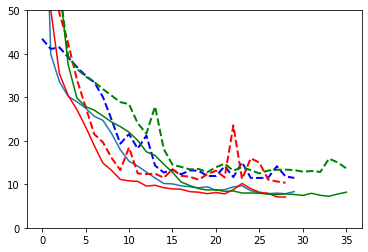

In [30]:
mpl_fig = plt.figure()
plt.plot(history1.history['loss']) #1 camada de 128
plt.plot(history1.history['val_loss'], ls = '--', color = 'b', linewidth=2)
plt.plot(history2.history['loss'], color = 'r') #2 camadas de 64
plt.plot(history2.history['val_loss'], color = 'r', ls = '--', linewidth=2)
plt.plot(history3.history['loss'], color = 'g') #4 camadas de 32
plt.plot(history3.history['val_loss'], color = 'g', ls = '--', linewidth=2)
plt.axis(ymax = 50, ymin = 0)

# tentativa de colocar no plotly
#tls.mpl_to_plotly(mpl_fig)
#plotly.offline.plot(_fig, filename="plotly version of an mpl figure")